# Failure Prediction for E-commerce use case
## Using Anomaly Detection

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Import dataset

In [3]:
data = pd.read_csv('data.csv')

# Let us take the feature considered i.e. Traffic of users in the web server for 60 days

x =  data.iloc[:,0:1].values

In [4]:
print(x)

[[ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 2]
 [ 3]
 [ 6]
 [ 2]
 [ 4]
 [ 4]
 [ 2]
 [ 2]
 [ 3]
 [ 4]
 [ 2]
 [ 4]
 [ 3]
 [ 2]
 [ 3]
 [20]
 [ 2]
 [ 2]
 [25]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 4]
 [ 3]
 [ 2]
 [ 4]
 [ 4]
 [ 2]
 [ 2]
 [ 3]
 [ 4]
 [ 2]
 [ 4]
 [ 3]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 4]
 [ 3]
 [ 2]
 [ 4]
 [ 4]
 [ 2]
 [ 2]
 [ 3]
 [ 4]
 [ 2]
 [ 4]
 [ 3]
 [ 2]
 [ 4]
 [ 2]]


# Build the Iforest model to detect anomalies

In [5]:
model=IsolationForest(contamination=float(0.1))
model.fit(x)

IsolationForest(contamination=0.1)

# Compute the anomaly score

In [6]:
data['scores']=model.decision_function(x)
data['anomaly']=model.predict(x)
data.tail(20)

,Traffic of web server,Daily error types,Daily request counts,Avg response time,Target,scores,anomaly
40,2,60,40,1.0,1,0.192284,1
41,3,90,60,1.5,1,0.165984,1
42,4,120,80,2.0,1,0.188928,1
43,5,150,100,2.5,-1,0.002610,1
44,6,180,120,3.0,-1,-0.023492,-1
45,4,120,80,2.0,1,0.188928,1
46,3,90,60,1.5,1,0.165984,1
47,2,60,40,1.0,1,0.192284,1
48,4,120,80,2.0,1,0.188928,1
49,4,120,80,2.0,1,0.188928,1


# Evaluating the model

In [7]:
outliers_counter = len(data[data['Traffic of web server'] >= 5])
outliers_counter

7

# Visualizing the anomalies

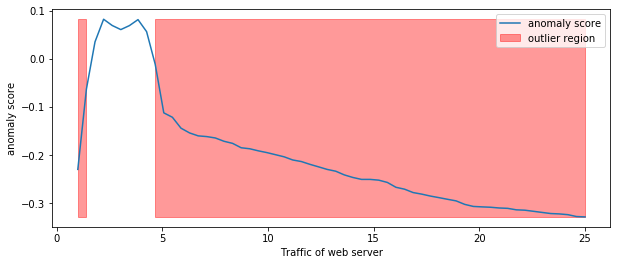

In [8]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data['Traffic of web server'].values.reshape(-1, 1))
xx = np.linspace(data['Traffic of web server'].min(), data['Traffic of web server'].max(), len(data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Traffic of web server')
plt.show();

# Confusion matrix
## This step is only for illustration purpose because we have a pre-defined target that captures       when the application failed

In [9]:
y_target = data.iloc[:, -1].values

In [10]:
print(y_target)

[-1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]


In [11]:
anomaly = data.iloc[:,4:5].values
#print(anomaly)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_target, anomaly)
print(cm)
accuracy_score(y_target, anomaly)

[[ 5  1]
 [ 2 52]]


0.95